In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
%matplotlib notebook

In [2]:
basepath = '/Users/blandt/Desktop/Data/PAR2 GCN4'
paths = direcslist(basepath, 2)

imgs = [load_image(p + '/af_corrected.tif') for p in paths]
imgs_flat = [load_image(p + '/af_corrected_flat.tif') for p in paths]
imgs_3channel = [load_image(p + '/af_corrected_3channel.tif') for p in paths]
imgs_3channel_flat = [load_image(p + '/af_corrected_3channel_flat.tif') for p in paths]

rois = [np.loadtxt(p + '/ROI_fit.txt') for p in paths]
cytbg = np.loadtxt('../T2A/cytbg.txt')
membg = np.loadtxt('../PAR2 RING mutants/mem_profile.txt')

In [3]:
iq = ImageQuant(img=imgs, cytbg=cytbg, membg=membg, roi=rois, uni_cyt=True, descent_steps=500, 
                rol_ave=5, lr=0.01, iterations=1, interp_type='linear')
iq.run()

100%|██████████| 500/500 [01:08<00:00,  7.26it/s]


Time elapsed: 70.25 seconds 


<IPython.core.display.Javascript object>


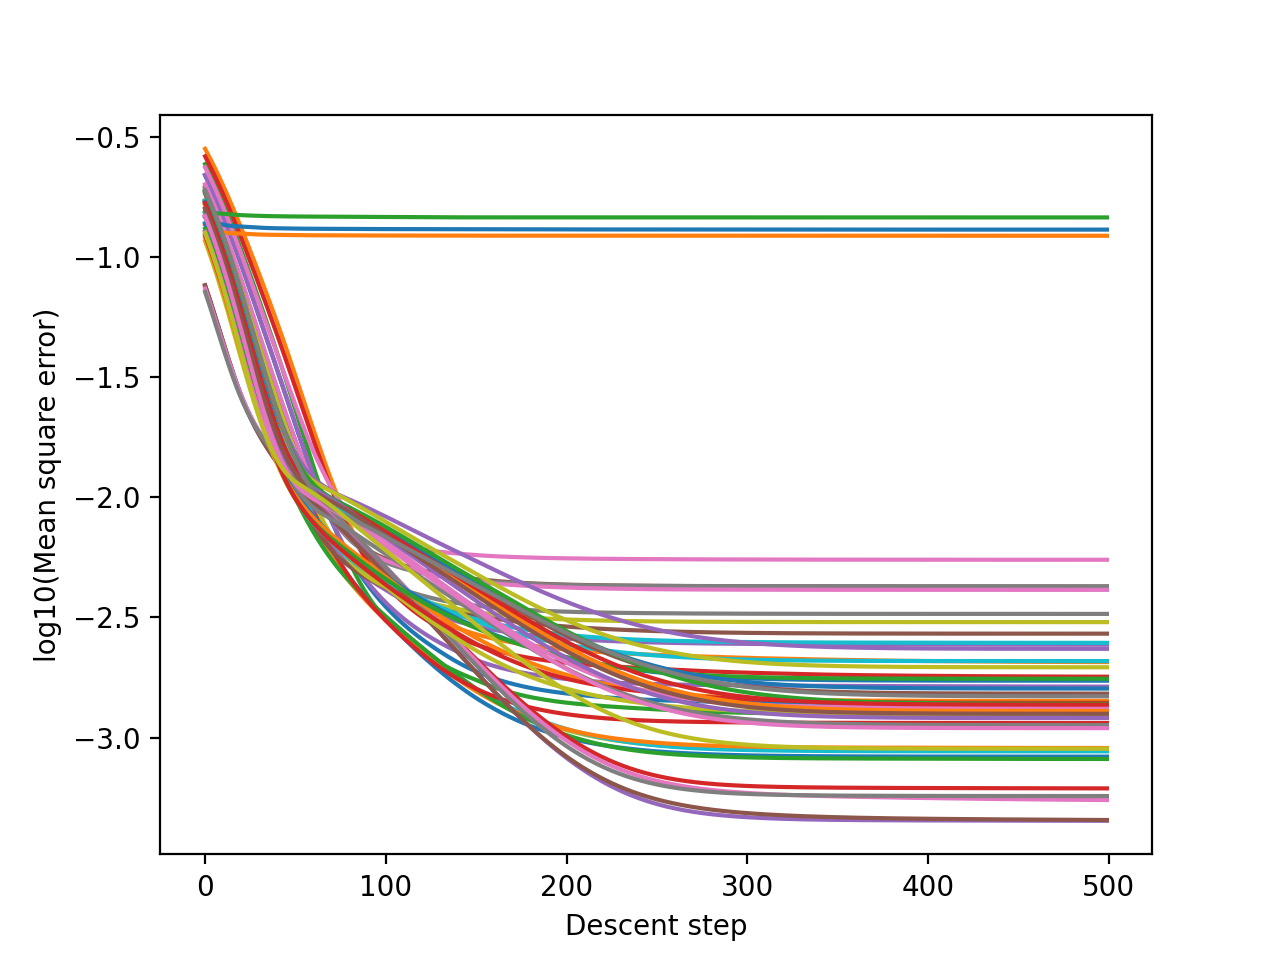

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='Descent step', ylabel='log10(Mean square error)'>)

In [8]:
iq.plot_losses(log=True)

<IPython.core.display.Javascript object>


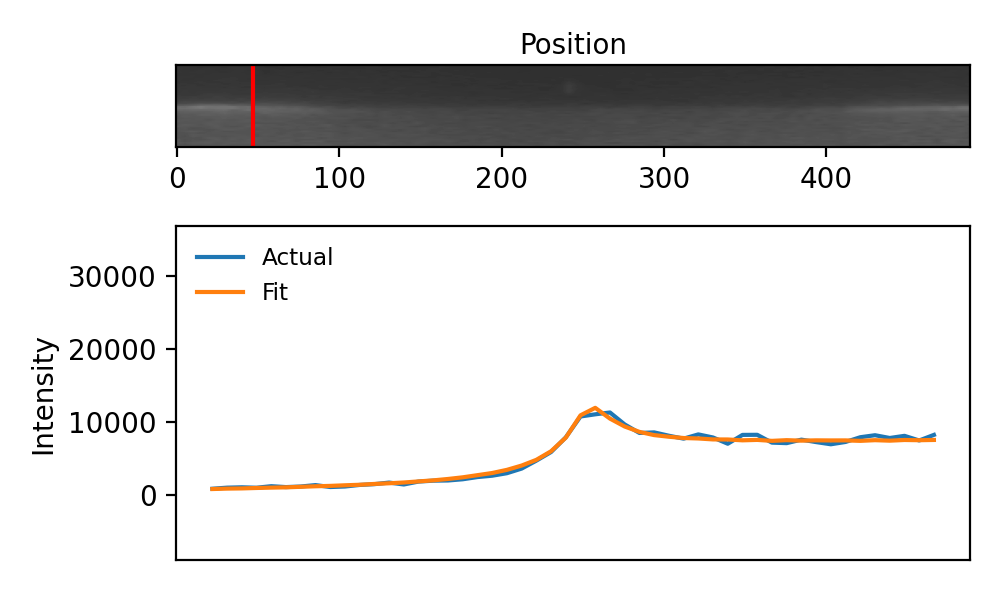

interactive(children=(IntSlider(value=0, description='Frame', max=48), FloatSlider(value=0.1, description='Pos…

(<Figure size 500x300 with 2 Axes>,
 (<AxesSubplot:xlabel='Position'>, <AxesSubplot:ylabel='Intensity'>))

In [9]:
iq.plot_fits(jupyter=True)

<IPython.core.display.Javascript object>


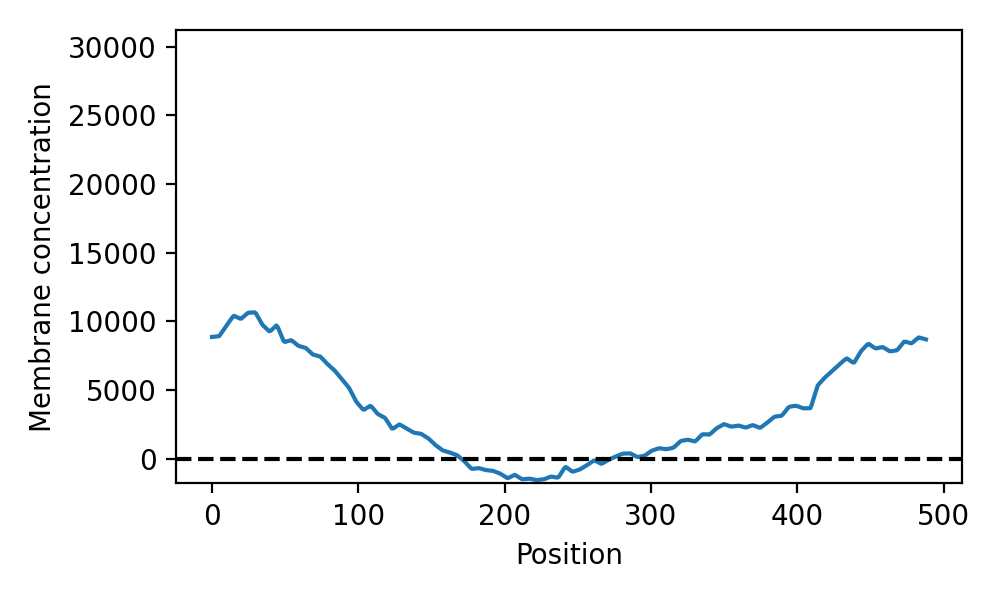

interactive(children=(IntSlider(value=0, description='Frame', max=48), Output()), _dom_classes=('widget-intera…

(<Figure size 500x300 with 1 Axes>,
 <AxesSubplot:xlabel='Position', ylabel='Membrane concentration'>)

In [10]:
iq.plot_quantification(jupyter=True)

In [7]:
res = iq.compile_res()
res.to_csv('res.csv')

conditions = [p.split('/')[-3] for p in paths]
mems = res.groupby('Frame').apply(lambda x: bounded_mean_1d(x['Membrane signal'], (0.9, 0.1)))
cyts = res.groupby('Frame').apply(lambda x: bounded_mean_1d(x['Cytoplasmic signal'], (0.9, 0.1)))
ratios = [m / c for m, c in zip(mems, cyts)]
dosages = [dosage(i, r, 5) for i, r in zip(imgs, rois)]

df = pd.DataFrame.from_dict({'Path': paths, 'Condition': conditions, 'Membrane': mems, 
                              'Cytoplasm': cyts, 'Ratio': ratios, 'Dosage': dosages})
df.to_csv('df.csv')

In [ ]:
imgs = [load_image(p + '/af_corrected.tif') for p in paths]

imgs = [load_image(glob.glob(p + '/*561 SP 630-75*')[0]) for p in paths]